In [5]:
import numpy as np
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.constraints import maxnorm
from keras.utils import np_utils
from keras.optimizers import SGD

In [6]:
#let us first execute the given code in the assignment so that we can compare it after adding the cnn layers
np.random.seed(7)                                                        # Fix random seed for reproducibility
(X_train, y_train), (X_test, y_test) = cifar10.load_data()               #Loading the data
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0                                # Normalize inputs from 0-255 to 0.0-1.0
y_train = np_utils.to_categorical(y_train)                               # One hot encode outputs
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]



In [7]:
#creating the model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), padding='same', activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(Flatten())
model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
sgd = SGD(learning_rate=0.01, momentum=0.9, decay=1e-6)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(model.summary())


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 dropout_6 (Dropout)         (None, 32, 32, 32)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 dense_3 (Dense)             (None, 512)               4194816   
                                                      

In [8]:
epochs = 5
batch_size = 32
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=batch_size)
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Epoch 1/5
1563/1563 [==============================] - 11s 6ms/step - loss: 1.6937 - accuracy: 0.3860 - val_loss: 1.4235 - val_accuracy: 0.4820
Epoch 2/5
1563/1563 [==============================] - 10s 6ms/step - loss: 1.3466 - accuracy: 0.5169 - val_loss: 1.2552 - val_accuracy: 0.5492
Epoch 3/5
1563/1563 [==============================] - 10s 7ms/step - loss: 1.1950 - accuracy: 0.5729 - val_loss: 1.1437 - val_accuracy: 0.5894
Epoch 4/5
1563/1563 [==============================] - 10s 6ms/step - loss: 1.0785 - accuracy: 0.6180 - val_loss: 1.0886 - val_accuracy: 0.6141
Epoch 5/5
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9817 - accuracy: 0.6546 - val_loss: 1.0235 - val_accuracy: 0.6401
Accuracy: 64.01%


In [9]:
#question 1
import numpy as np
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.constraints import maxnorm
from keras.utils import np_utils
from keras.optimizers import SGD

                                                                  # Fix random seed for reproducibility
np.random.seed(7)
                                                                  # Load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

X_train = X_train.astype('float32') / 255.0                       # Normalize inputs from 0-255 to 0.0-1.0
X_test = X_test.astype('float32') / 255.0
                                                                  # One hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

                                                                 # Creating the model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), padding='same', activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))
                                                                                           # Compiling the model
epochs = 5
learning_rate = 0.01
decay_rate = learning_rate / epochs
sgd = SGD(lr=learning_rate, momentum=0.9, decay=decay_rate, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(model.summary())

                                                                                           # Fit the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32)

                                                                                           # Evaluating the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1] * 100))


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 dropout_8 (Dropout)         (None, 32, 32, 32)        0         
                                                                 
 conv2d_9 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 dropout_9 (Dropout)         (None, 16, 16, 64)        0         
                                                      

In [13]:
#question2
predictions = model.predict(X_test[:4])                         # Predicting the first 4 images of the test data
predicted_labels = np.argmax(predictions, axis=1)           # Converting the predictions into class labels
actual_labels = np.argmax(y_test[:4], axis=1)                # Converting the actual labels to class labels

print("Predicted labels:", predicted_labels)                    # the predicted and actual labels for the first 4 images
print("Actual labels:   ", actual_labels)

1/1 [==============================] - 0s 21ms/step
Predicted labels: [3 8 8 8]
Actual labels:    [3 8 8 0]


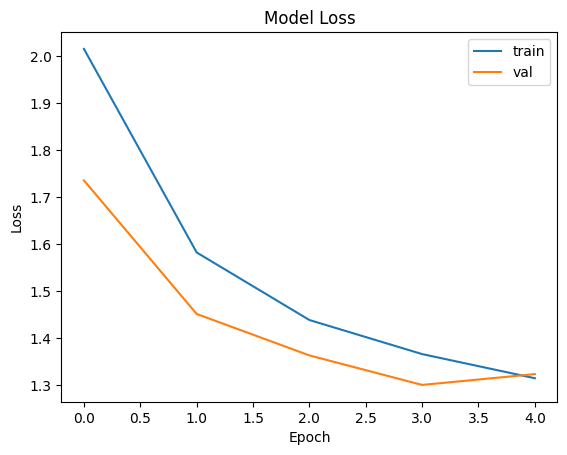

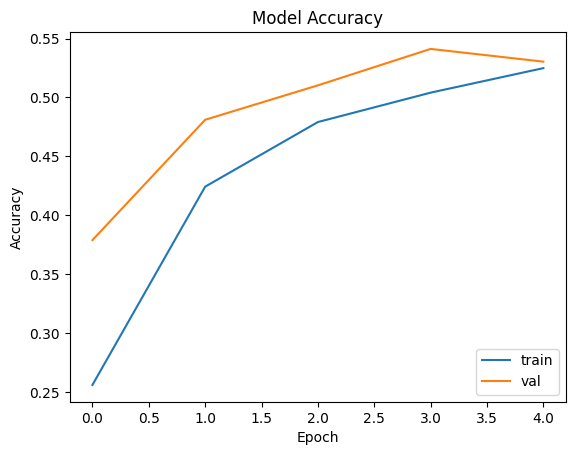

In [14]:
#question 3:
import matplotlib.pyplot as plt

# Plot the training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

# Plot the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()